In [7]:
from PlotFunctions import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from TestProblems import prey_predator_model, van_der_pol_model, CSTR_3state_model, CSTR_1state_model
from Solvers import ExplicitEulerFixedSteps, ExplicitEulerAdaptiveStep, ImplicitEulerFixedStep

In [ ]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, J = prey_predator_model(a, b)

reference = {'dt = 0.01': solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000)),
             'dt = 0.001': solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 10000))}


N = 1000
# Solve using Explicit Euler with fixed step size

solution_fixed_t_pp01, solution_fixed_x_pp01 = ExplicitEulerFixedSteps(f, t_span[0], t_span[1], N, x0)

N = 10000

solution_fixed_t_pp001, solution_fixed_x_pp001 = ExplicitEulerFixedSteps(f, t_span[0], t_span[1], N, x0)

comparison = {'dt = 0.01': solution_fixed_x_pp01,
              'dt = 0.001': solution_fixed_x_pp001}

plot_multiple_relative_errors(
    reference_series=reference,
    comparison_series_list=comparison,
    param1_name='dt = 0.1',
    param2_name='dt = 0.01',
    series_names=['Low Noise', 'Medium Noise', 'High Noise'],
    time=,
    title='Multiple Series Error Comparison',
    display_as_percentage=True,
    ylim=(0, 100)  )

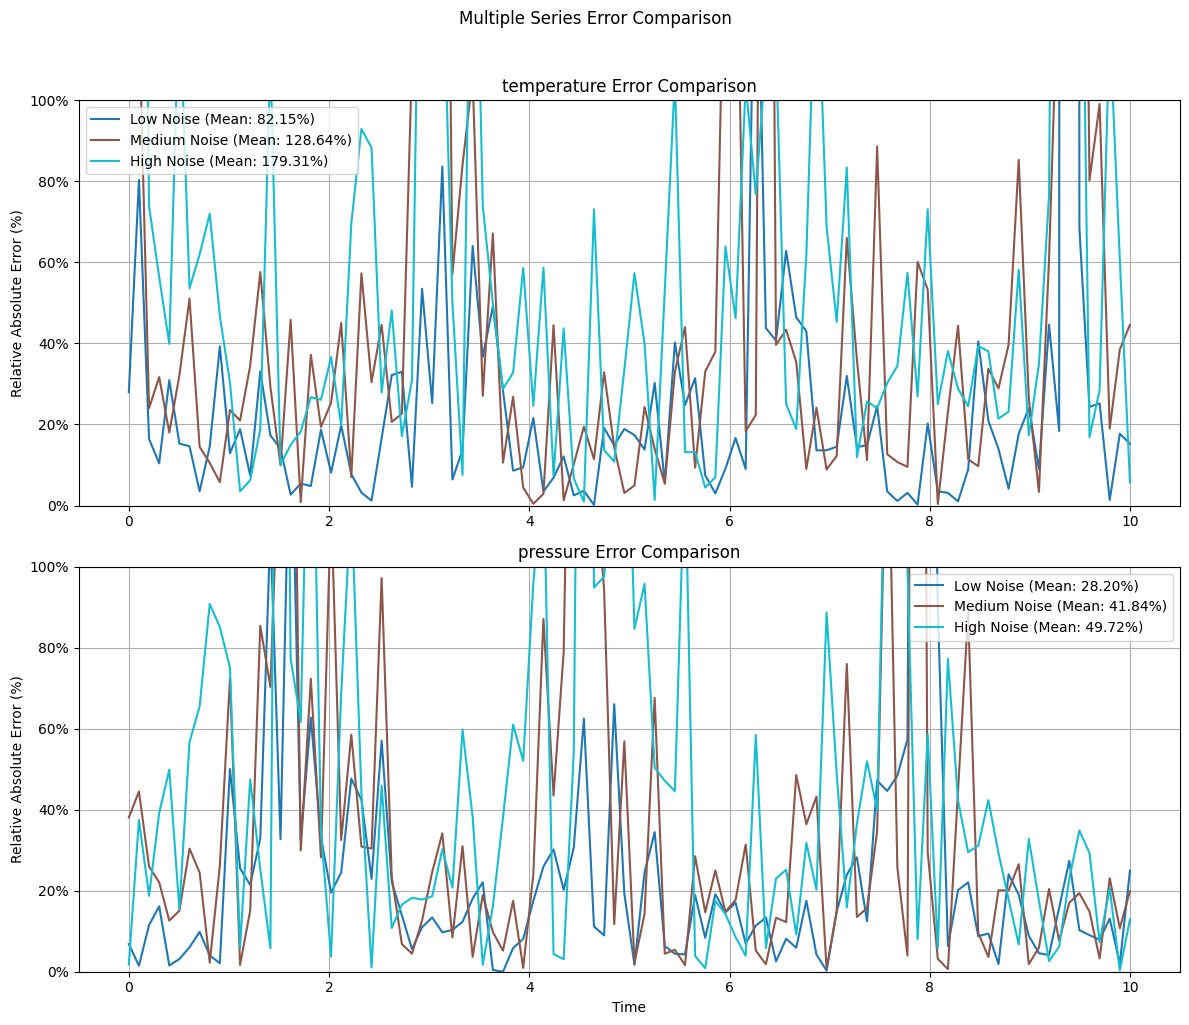


Error Statistics:

temperature:
------------------------------
Low Noise:
  Mean Error: 82.15%
  Max Error:  6091.81%
  Std Dev:    604.41%
------------------------------
Medium Noise:
  Mean Error: 128.64%
  Max Error:  7218.01%
  Std Dev:    719.27%
------------------------------
High Noise:
  Mean Error: 179.31%
  Max Error:  11257.07%
  Std Dev:    1118.35%
------------------------------

pressure:
------------------------------
Low Noise:
  Mean Error: 28.20%
  Max Error:  478.74%
  Std Dev:    55.20%
------------------------------
Medium Noise:
  Mean Error: 41.84%
  Max Error:  525.17%
  Std Dev:    67.43%
------------------------------
High Noise:
  Mean Error: 49.72%
  Max Error:  350.74%
  Std Dev:    57.32%
------------------------------


In [6]:
# Generate sample data
np.random.seed(42)
time = np.linspace(0, 10, 100)
reference = {
    'temperature': np.sin(time) + 0.1 * np.random.normal(size=100),
    'pressure': np.cos(time) + 0.1 * np.random.normal(size=100)
}

# Create multiple comparison series
comparisons = []
for i in range(3):
    noise_level = 0.1 * (i+1)
    comparisons.append({
        'temperature': np.sin(time) + noise_level * np.random.normal(size=100),
        'pressure': np.cos(time) + noise_level * np.random.normal(size=100)
    })

# Plot the errors
plot_multiple_relative_errors(
    reference_series=reference,
    comparison_series_list=comparisons,
    param1_name='temperature',
    param2_name='pressure',
    series_names=['Low Noise', 'Medium Noise', 'High Noise'],
    time=time,
    title='Multiple Series Error Comparison',
    display_as_percentage=True,
    ylim=(0, 100)  )